In [92]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [93]:
connection = mysql.connector.connect(host='localhost', 
                                     database='integrated_data', 
                                     user='lanang_afkaar', 
                                     password='1q2w3e4r5t')

In [94]:
sql_select_Query = "SELECT * FROM prices_estimation_for_house_sales"
cursor = connection.cursor()
cursor.execute(sql_select_Query)

In [95]:
records = cursor.fetchall()
print("Total number of rows in table: ", cursor.rowcount)

Total number of rows in table:  21613


In [96]:
df_houses = pd.DataFrame(list(records), columns=['price', 
                                                   'bedrooms','bathrooms',
                                                   'sqft_living','sqft_lot','floors',
                                                   'waterfront','view','condition','grade',
                                                   'sqft_above','sqft_basement','yr_built','yr_renovated',
                                                   'zipcode','lat','long','sqft_living15','sqft_lot15'])
df_houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [97]:
df_houses['price'] = pd.to_numeric(df_houses['price'],errors = 'coerce')
df_houses['bathrooms'] = pd.to_numeric(df_houses['bathrooms'],errors = 'coerce')
df_houses['floors'] = pd.to_numeric(df_houses['floors'],errors = 'coerce')
df_houses['lat'] = pd.to_numeric(df_houses['lat'],errors = 'coerce')
df_houses['long'] = pd.to_numeric(df_houses['long'],errors = 'coerce')

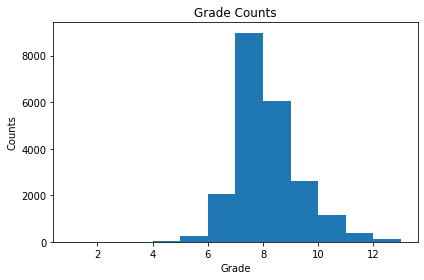

In [105]:
#hist2 = [go.Histogram(x=data.yr_built,xbins=dict(start=np.min(data.yr_built),size=1,end=np.max(data.yr_built)),marker=dict(color='rgb(0,102,0)'))]

x = df_houses.grade
plt.subplots(sharey=True, tight_layout=True)

bins = 12
# Freedman–Diaconis Rule to count appropriate Bins *Optional
#q25, q75 = np.percentile(x, [0.25, 0.75])
#bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
#bins = int(round((x.max() - x.min()) / bin_width))

plt.hist(x, bins=bins)
plt.title('Grade Counts')
plt.ylabel("Counts")
plt.xlabel("Grade")
plt.show()

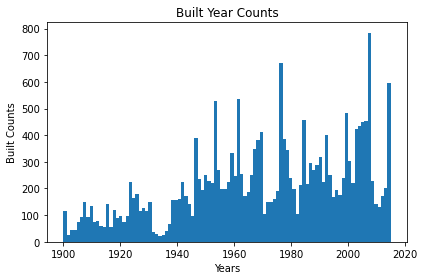

In [99]:
#hist2 = [go.Histogram(x=data.yr_built,xbins=dict(start=np.min(data.yr_built),size=1,end=np.max(data.yr_built)),marker=dict(color='rgb(0,102,0)'))]

x = df_houses.yr_built
plt.subplots(sharey=True, tight_layout=True)

bins = 100
# Freedman–Diaconis Rule to count appropriate Bins *Optional
#q25, q75 = np.percentile(x, [0.25, 0.75])
#bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
#bins = int(round((x.max() - x.min()) / bin_width))

plt.hist(x, bins=bins)
plt.title('Built Year Counts')
plt.ylabel("Built Counts")
plt.xlabel("Years")
plt.show()

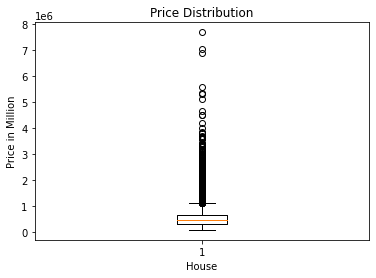

In [100]:
x = df_houses['price']
plt.boxplot(x, vert=True)
plt.title('Price Distribution')
plt.xlabel('House')
plt.ylabel('Price in Million')
plt.show()

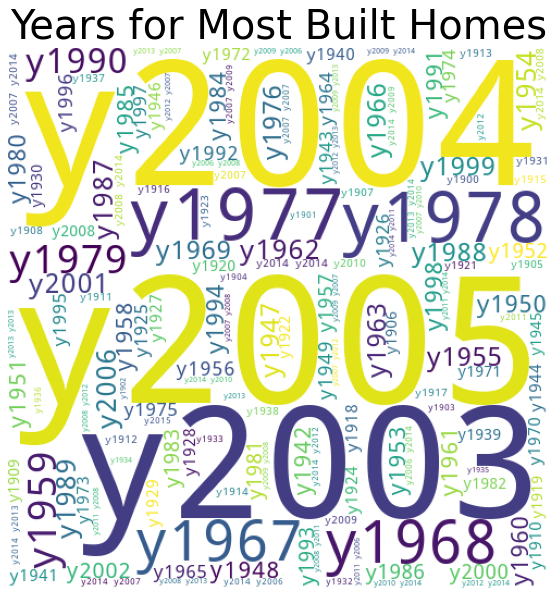

In [103]:
builtyear = pd.DataFrame({"Years":df_houses.yr_built})
builtyear["Years"] = builtyear["Years"].apply(lambda x: "y" + str(x)) #I can't use wordcloud with integers so I put y on head
builtyear["Years"].head()

plt.subplots(figsize=(10,10))
wcloud  = WordCloud(background_color="white",width=500,height=500).generate(",".join(builtyear["Years"]))
plt.imshow(wcloud)
plt.title("Years for Most Built Homes",fontsize=40)
plt.axis("off")
plt.show()

In [13]:
df_houses_dtype = df_houses.dtypes
df_houses_dtype

price            object
bedrooms          int64
bathrooms        object
sqft_living       int64
sqft_lot          int64
floors           object
waterfront        int64
view              int64
condition         int64
grade             int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
zipcode           int64
lat              object
long             object
sqft_living15     int64
sqft_lot15        int64
dtype: object

In [10]:
df_houses_described = df_houses.describe()
df_houses_described

,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2079.899736,1.510697e+04,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,0.930062,918.440897,4.142051e+04,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,0.000000,290.000000,5.200000e+02,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.000000,1427.000000,5.040000e+03,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.000000,1910.000000,7.618000e+03,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,4.000000,2550.000000,1.068800e+04,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,33.000000,13540.000000,1.651359e+06,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [23]:
df_predictHouses = df_houses.drop(['lat', 'long'], axis = 1)
df_predictHouses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [24]:
y = df_predictHouses.pop("price")
x = df_predictHouses.copy()

print(y)
print(x)

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: object
       bedrooms bathrooms  sqft_living  sqft_lot floors  waterfront  view  \
0             3      1.00         1180      5650    1.0           0     0   
1             3      2.25         2570      7242    2.0           0     0   
2             2      1.00          770     10000    1.0           0     0   
3             4      3.00         1960      5000    1.0           0     0   
4             3      2.00         1680      8080    1.0           0     0   
...         ...       ...          ...       ...    ...         ...   ...   
21608         3      2.50         1530      1131    3.0           0     0   
21609         4      2.50         2310      5813    2.0           0     0   
21610         2      0.75         1020      1350    2.0           0     0   
21611       

In [25]:
x_array = np.array(x)
y_array = np.array(y)

In [26]:
print(x_array)
print(y_array)

[[3 Decimal('1.00') 1180 ... 98178 1340 5650]
 [3 Decimal('2.25') 2570 ... 98125 1690 7639]
 [2 Decimal('1.00') 770 ... 98028 2720 8062]
 ...
 [2 Decimal('0.75') 1020 ... 98144 1020 2007]
 [3 Decimal('2.50') 1600 ... 98027 1410 1287]
 [2 Decimal('0.75') 1020 ... 98144 1020 1357]]
['221900' '538000' '180000' ... '402101' '400000' '325000']


In [29]:
x_array = np.trunc(x_array)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.3, random_state=0)

In [31]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [32]:
print(regressor.intercept_)
print(regressor.coef_)

498489.4431184024
[-3.36020673e+04  5.15723066e+04  1.02750228e+02  8.89816797e-02
  2.85780784e+04  5.92236860e+05  4.33606482e+04  2.13480146e+04
  1.19884049e+05  4.47167668e+01  5.80334612e+01 -3.51797395e+03
  5.47306142e+00  5.69010658e+01  3.35497537e+01 -5.92612734e-01]


In [33]:
y_pred = regressor.predict(x_test)

In [34]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
0,297000,2.808343e+05
1,1.578e+006,1.493669e+06
2,562100,4.737276e+05
3,631500,5.806108e+05
4,780000,8.388611e+05
...,...,...
6479,1.1e+006,4.175758e+05
6480,700000,4.702537e+05
6481,380000,3.072272e+05
6482,268000,2.747290e+05
